In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

In [3]:
data_dtm = pd.read_pickle("data/preprocessed/final_data_dtm.pkl")

In [4]:
data_dtm

,aaa,aaas,aaron,abandoned,abandoning,abba,abbas,abbasi,abbott,abc,...,zealand,zeeuw,zen,zero,zhang,zombie,zombies,zone,zones,zurich
category,,,,,,,,,,,,,,,,,,,,,
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tech,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tech,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_dtm.index

Index(['business', 'business', 'business', 'business', 'business', 'business',
       'business', 'business', 'business', 'business',
       ...
       'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'tech', 'tech',
       'tech'],
      dtype='object', name='category', length=2225)

In [9]:
labels = {category: idx for idx, category in enumerate(set(data_dtm.index))}

In [15]:
y = np.array([labels[category] for category in data_dtm.index])

In [16]:
X = data_dtm.values

In [17]:
X.shape, y.shape

((2225, 10000), (2225,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, y_train.shape

((1780, 10000), (1780,))

In [20]:
X_test.shape, y_test.shape

((445, 10000), (445,))

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [23]:
svc.score(X_train, y_train)

0.9955056179775281

In [24]:
svc.score(X_test, y_test)

0.950561797752809

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
from sklearn.metrics import plot_confusion_matrix

In [27]:
y_pred = svc.predict(X_test)

In [31]:
conf_mat = confusion_matrix(y_test, y_pred)

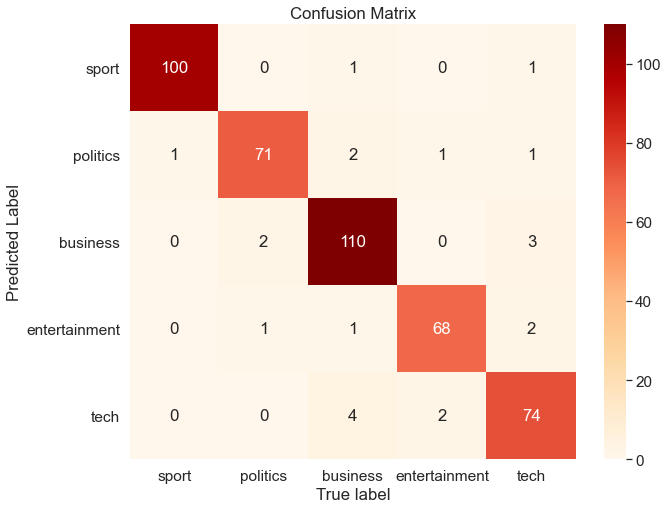

In [50]:
sns.set(font_scale=1.4)
df_cm = pd.DataFrame(conf_mat, index = list(labels.keys()),columns =list(labels.keys()))
plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, cmap=plt.get_cmap('OrRd'), fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("True label")
plt.ylabel("Predicted Label")
plt.show()

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       102
           1       0.96      0.93      0.95        76
           2       0.93      0.96      0.94       115
           3       0.96      0.94      0.95        72
           4       0.91      0.93      0.92        80

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



In [60]:
clf_report = classification_report(y_test,
                                   y_pred,
                                   labels = list(labels.values()),
                                   target_names = list(labels.keys()),
                                   output_dict=True)

In [103]:
clf_report_df = pd.DataFrame(clf_report)
clf_report_df.drop("support", axis=0, inplace=True)
clf_report_df.drop(['macro avg', "weighted avg"], axis=1, inplace=True)

In [104]:
clf_report_df

,sport,politics,business,entertainment,tech,accuracy
precision,0.990099,0.959459,0.932203,0.957746,0.913580,0.950562
recall,0.980392,0.934211,0.956522,0.944444,0.925000,0.950562
f1-score,0.985222,0.946667,0.944206,0.951049,0.919255,0.950562


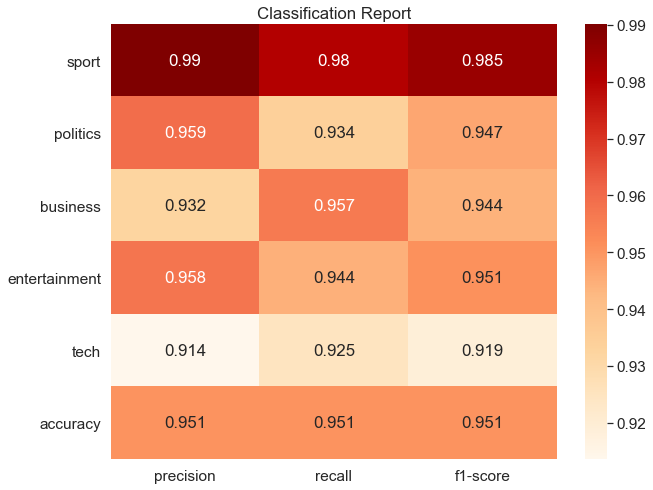

In [106]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,8))
sns.heatmap(clf_report_df.T, annot=True,cmap=plt.get_cmap('OrRd'), fmt='.3g')
plt.title("Classification Report")
plt.show()